In [7]:
import sys
sys.path.append('./../')

import xarray as xr
import parcels
import numpy as np
import parcels 
from ikamoana.utils.feedinghabitatutils import seapodymFieldConstructor
from ikamoana.ikafish.ikafish import IkaFish
import ikamoana.ikasimulation as ikasim

# First we initialize and load fields

In [8]:
my_sim = ikasim.IkaSimulation()

> We can use both fielpaths, fields, dataarray, fieldset and dataset.

In [9]:
my_filepaths = {
    "U":"./../data/SEAPODYM_data/run-test/data/run-interim_2x30d_po/po_interim_historic_2x30d_u_L1_1979_2010.dym",
    "V":"./../data/SEAPODYM_data/run-test/data/run-interim_2x30d_po/po_interim_historic_2x30d_v_L1_1979_2010.dym"
}

my_fields = {
    "U":seapodymFieldConstructor("./../data/SEAPODYM_data/run-test/data/run-interim_2x30d_po/po_interim_historic_2x30d_u_L1_1979_2010.dym", "U"),
    "V":seapodymFieldConstructor("./../data/SEAPODYM_data/run-test/data/run-interim_2x30d_po/po_interim_historic_2x30d_v_L1_1979_2010.dym", "V")
}

my_fieldset = parcels.FieldSet(
    U=parcels.Field.from_xarray(my_fields['U'], "U", {'time':'time', 'lat':'lat', 'lon':'lon'}),
    V=parcels.Field.from_xarray(my_fields['V'], "V", {'time':'time', 'lat':'lat', 'lon':'lon'}))

my_dataset = xr.Dataset(my_fields)

In [13]:
my_sim.loadFields(fields=my_fieldset, inplace=True)

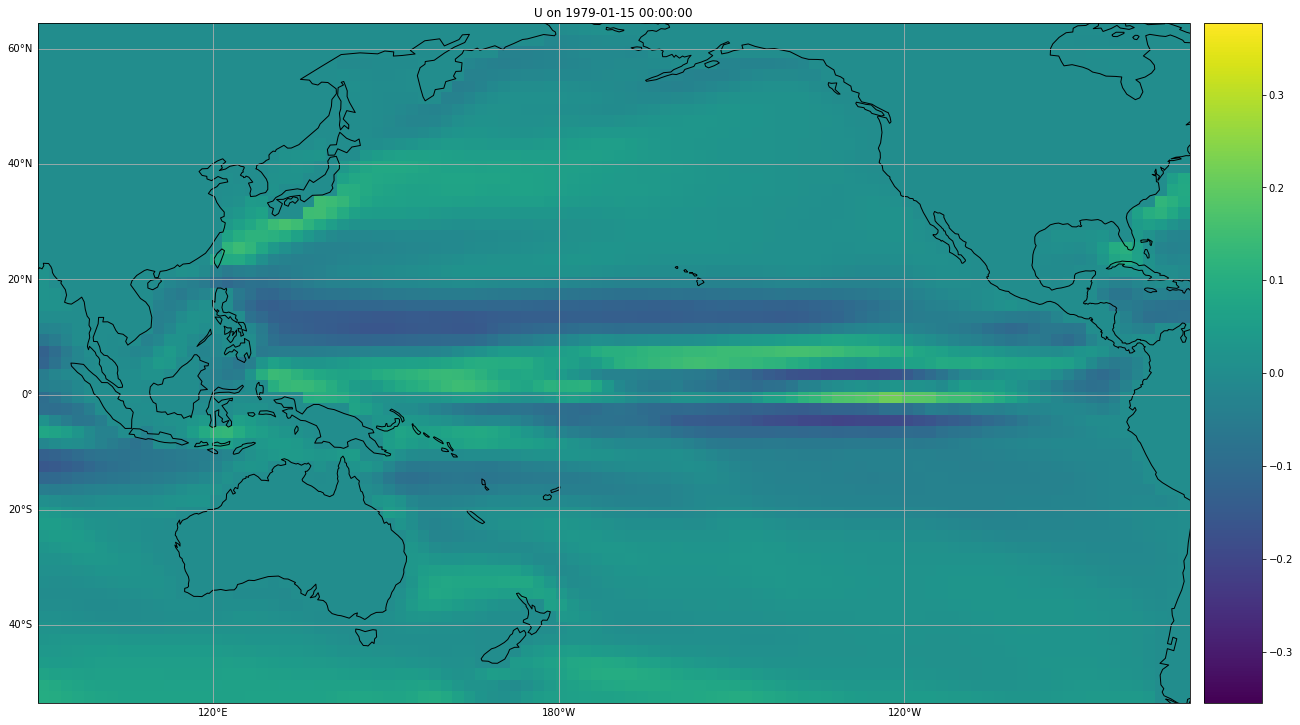

In [14]:
my_sim.ocean.U.show()

# Then we initialize ParticleSet (using list of latitudes and longitudes)

In [15]:
my_sim.initializeParticleSet(
    particles_longitude=[150],
    particles_latitude=[10],
    particles_class=IkaFish,
    particles_starting_time=np.datetime64('1979-01-15'),
    particles_variables={"age":[0],
                         "age_class":[0]}
)

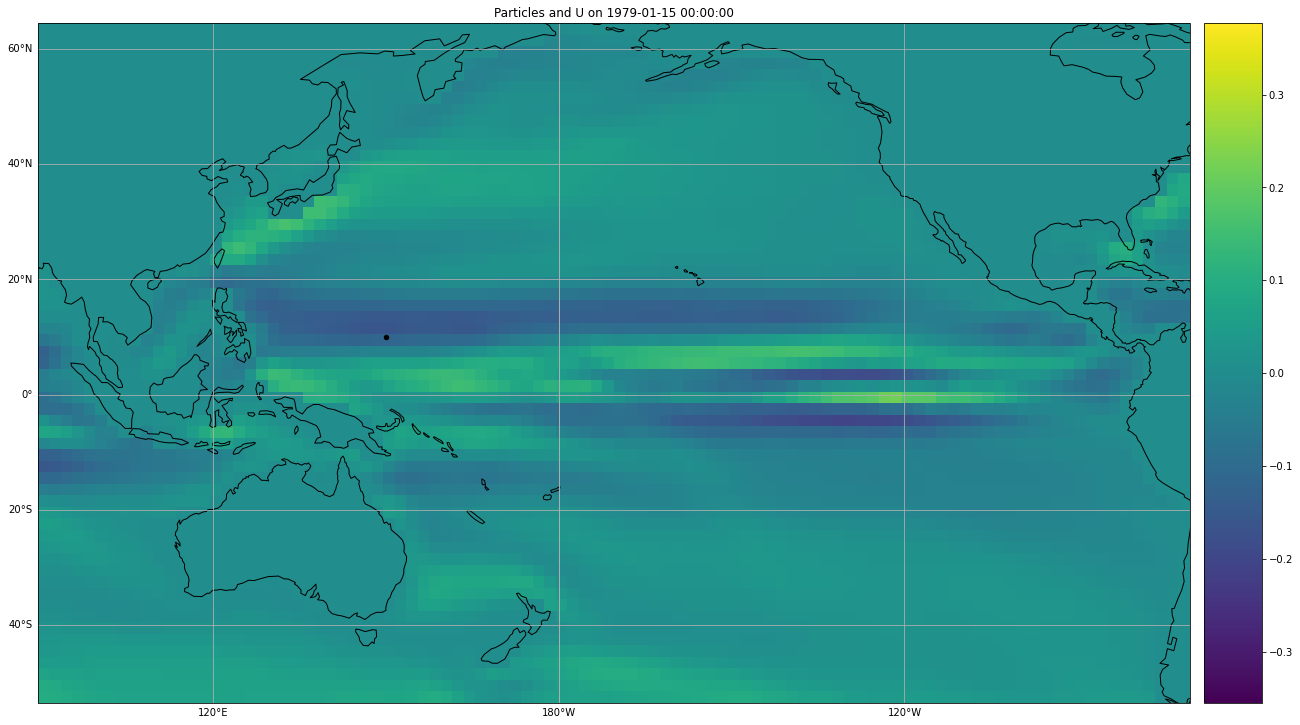

In [17]:
my_sim.fish.show(field=my_sim.ocean.U)

# And finally kernel(s) can be executed

In [20]:
my_sim.fish

P[0](lon=146.480789, lat=10.489592, depth=0.000000, age_class=0.000000, time=2592000.000000)

In [21]:
my_sim.runKernels(
    {"AdvectionRK4":parcels.AdvectionRK4},
    duration_time= 30 * (24*60*60),
    #end_time=np.datetime64('1980-02-15'),
    delta_time=24*60*60,
    output_delta_time=24*60*60,
)

INFO: Compiled ArrayIkaFishAdvectionRK4 ==> /tmp/parcels-1000/libc524df5f16d9d13b147220c6e19f6274_0.so


In [22]:
my_sim.fish

P[0](lon=142.437119, lat=10.924326, depth=0.000000, age_class=0.000000, time=5184000.000000)

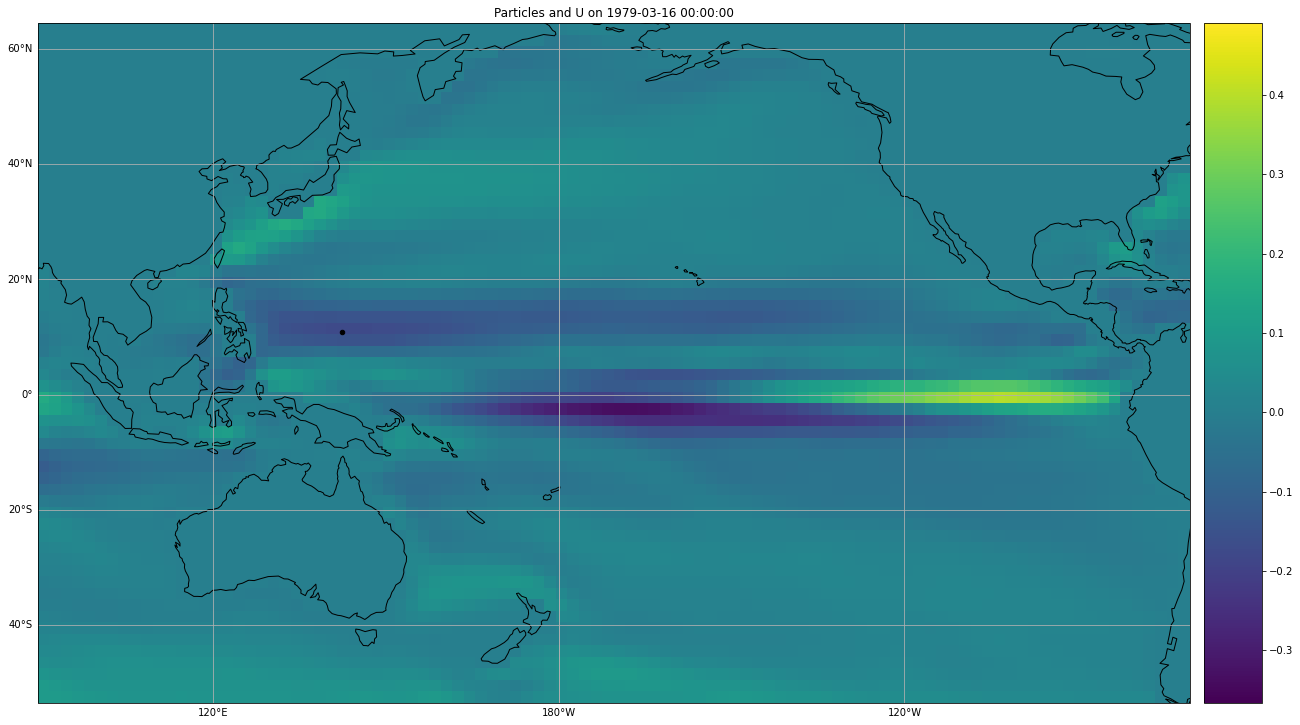

In [23]:
my_sim.fish.show(field=my_sim.ocean.U)

---